\begin{table}
\begin{center}
\resizebox{17cm}{!}{
\begin{tabular}{| c | c | c | c | }
\hline
\multicolumn{3}{ |c| }{\textbf{ESCUELA POLITÉCNICA NACIONAL}} & \textbf{INFORME N°} \\
\multicolumn{3}{ |c| }{Estructura de Datos y Algoritmos II - Computaci\'on} & \\ \hline
\textbf{NOMBRE:} & \multicolumn{2}{ |c| }{Mark Hernández y Leandro Bravo} & 8 \\ \hline
\end{tabular}
}
\label{tab:encabezado}
\end{center}
\end{table}

\begin{center}
    \textbf{Proyecto Bimestral - Implementación DFS y BFS}
\end{center}

\section{1. OBJETIVOS} 

\textbf{1.1.- } Aplicar el algoritmo de Búsqueda en Anchura (BFS) para determinar la ruta más eficiente desde el Playón de la Marín hasta el Centro Comercial El Tejar.   
\textbf{1.2.- } Emplear el algoritmo de Búsqueda en Profundidad (DFS) con el fin de examinar todas las rutas viables y establecer la ruta más extensa, en términos de cantidad de nodos atravesados, entre los mismos puntos. 

\section{2. INTRODUCCIÓN}

Este documento presenta un análisis detallado de algoritmos de búsqueda en grafos y su aplicación en la optimización de rutas urbanas. Se explora el uso del algoritmo de Búsqueda en Anchura (BFS) para identificar la ruta más corta, proporcionando una solución eficiente para la navegación entre puntos estratégicos de la ciudad. Adicionalmente, se examina el algoritmo de Búsqueda en Profundidad (DFS) para determinar la ruta más extensa, ofreciendo una perspectiva completa sobre todas las rutas posibles. Este enfoque permite una comprensión profunda de las dinámicas de tránsito y las posibilidades de conectividad urbana.

\section{3. DESARROLLO}

\textbf{1. } Dados los algoritmos BFS y DFS, realizar la implementación en Python siguiendo el paradigma orientado a objetos y el ADT de grafo (debería definir las clases Grafo, Nodo y Arista).

**Definición de la clase Nodo:**

In [7]:
class Nodo:
    def __init__(self, nombreInt):
        self.nombreInt = nombreInt
        self.vecinos = []
        
    def agregar_vecinos(self, arista):
        self.vecinos.append(arista)

**Definición de la clase Arista:**

In [9]:
class Arista:
    def __init__(self, nodo_inicio, nodo_fin):
        self.nodo_inicio = nodo_inicio
        self.nodo_fin = nodo_fin

**Definición de la clase Grafo:**

In [11]:
class Grafo:
    def __init__(self, estructura_grafo):
        self.nodos = {}
        for inicio in estructura_grafo:
            self.agregar_nodo(inicio)
            for fin in estructura_grafo[inicio]:
                self.agregar_arista(inicio, fin)

    def agregar_nodo(self, nombreInt):
        if nombreInt not in self.nodos:
            self.nodos[nombreInt] = Nodo(nombreInt)

    def agregar_arista(self, inicio, fin):
        if inicio not in self.nodos:
            self.agregar_nodo(inicio)
        if fin not in self.nodos:
            self.agregar_nodo(fin)
        arista = Arista(self.nodos[inicio], self.nodos[fin])
        self.nodos[inicio].agregar_vecinos(arista)
    
    #Método BFS
    def bfs(self, inicio, fin):
        visitados = set()
        cola = [(self.nodos[inicio], [inicio])]

        while cola:
            nodo_actual, camino = cola.pop(0)
            if nodo_actual.nombreInt == fin:
                return camino

            for arista in nodo_actual.vecinos:
                if arista.nodo_fin.nombreInt not in visitados:
                    visitados.add(arista.nodo_fin.nombreInt)
                    cola.append((arista.nodo_fin, camino + [arista.nodo_fin.nombreInt]))

        return None
    
    #Método DFS
    def dfs(self, inicio, fin):
        def dfs_recursivo(nodo, fin, visitados, camino):
            if nodo.nombreInt in visitados:
                return None
            visitados.add(nodo.nombreInt)
            camino.append(nodo.nombreInt)
            if nodo.nombreInt == fin:
                return list(camino)
            max_camino = None
            for arista in nodo.vecinos:
                nuevo_camino = dfs_recursivo(arista.nodo_fin, fin, visitados, camino)
                if nuevo_camino:
                    if not max_camino or len(nuevo_camino) > len(max_camino):
                        max_camino = nuevo_camino
            camino.pop()
            visitados.remove(nodo.nombreInt)
            return max_camino

        visitados = set()
        return dfs_recursivo(self.nodos[inicio], fin, visitados, [])

\textbf{2. } Muestra la ejecución de los dos algoritmos con un ejemplo de grafo (ingreso por consola o por archivo). Asuma la aplicación de BFS y DFS en casos de uso reales (por ejemplo: las salidas de evacuación en un campus universitario) y describa el caso de ejemplo o definición del problema y la demo del algoritmo. Debería desplegarse el resultado para:

a. BFS: la ruta más corta del nodo Start al nodo Finish.

b. DFS: la ruta más profunda del nodo Start

En la ciudad de Quito, los conductores frecuentemente necesitan viajar desde el Playón de la Marín hasta el Centro Comercial El Tejar. Para facilitar este viaje, queremos modelar la red vial y utilizar los diferentes algoritmos de búsqueda para encontrar la mejor ruta y la ruta más profunda de acuerdo con diferentes criterios.

**Descripción del grafo:**

- **Nodos:** Representan las intersecciones claves en las vías que nos permiten dirigirnos al Centro Comercial El Tejar.
- **Aristas:** Representan las conexiones directas entre estas intersecciones.

Para la creación de nuestro grafo utilizamos GoogleMaps con el fin de poder encontrar las intersecciones (nodos) adecuadas que nos lleven al Centro Comercial El Tejar desde el Playón de la Marín a través de las diferentes aristas (dirección de las vías). El grafo obtenido sobre el mapa es el siguiente:

![Elección de nodos sobre las intersecciones que tienen vías que se dirigen del Playón de la Marín al Cetro Comercial El Tejar.](prevGrafo.png){width=70%}

Para los nombres de los nodos se decidió utilizar los puntos de referencia de las calles que se intersecan, en caso de que dos nodos compartan un punto de referencia se lo identifica con una característica extra, por ejemplo, Jose J. Olmedo Bajo y Jose J. Olmedo. El código utilizado para gráficar el grafo asociado a nuestro problema es el siguiente:

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import ast

# Función para leer el grafo desde un archivo
def leer_grafo_desde_archivo(nombre_archivo):
    with open(nombre_archivo, 'r') as archivo:
        contenido = archivo.read()
    estructura_grafo = ast.literal_eval(contenido)
    return estructura_grafo

In [104]:
def graficar(camino,titulo):
    # Crear el grafo usando networkx
    G = nx.DiGraph()

    for nodo_inicio, nodos_adyacentes in estructura_grafo.items():
        for nodo_fin in nodos_adyacentes:
            if nodo_fin:  # Ignorar nodos vacíos
                G.add_edge(nodo_inicio, nodo_fin)

    # Definir posiciones manuales para los nodos
    pos = {
        "Playon": (4, 3),
        "Sucre": (2, 6),
        "E.Marin": (4, 7),
        "Park. Cumanda": (2, 1),
        "Jose J. Olmedo": (4, 8.5),
        "Jose J. Olmedo Bajo": (5, 8),
        "P.Ministerio de Defensa": (2, 0),
        "Monumento al Aguila": (-4, 7),
        "Mercado Central": (5, 9.5),
        "La Recoleta": (0, 0),
        "Tunel De San Roque": (-5, 9.5),
        "Vicente Rocafuerte Y Chimborazo": (-3.5, 7.5),
        "Plaza del Teatro": (4, 10),
        "Banco General Ruminahui": (0, 1),
        "El Tejar": (-3, 13),
        "Monumento Hermano Miguel": (-2, 9),
        "Consultorio Odontologico Familiar": (2.9, 9),
        "Clinica San Bartolo": (2.20, 11),
        "Teatro Paco Godoy": (1.6,11.3),
        "Iglesia Sto-Dgo": (0, 5),
        "Jose Lopez y Mejia": (-2.5, 12),
        "Imbabura y Mejia": (-1.5, 10.3),
        "El Sector El Tejar Centro De Quito": (-3.5, 10.4),
        "Chorigol Centro Historico": (2, 10),
        "Bodega La Economica Especias Y Alinos": (-1.4, 6.4),
        "Centro Comercial El Tejar": (-2.5, 10.7),
        "Confiteria Nancitas": (-1.9, 11),
        "Hermano Miguel y Chimborazo": (-2.3, 9.8),
        "Escuela de Arte Quiteno": (1.2, 10.25),
        "Comercial 1000 Cosas": (0, 10.7),
        "Don Pollo": (-0.9, 11.3),
        "Paka Comercial": (-1.6, 11.8),
        "Iglesia de Jesus": (-0.9,7.5)
    }

    # Dibujar el grafo
    plt.figure(figsize=(12, 12))

    # Dibujar nodos y aristas
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='#A1EBE4')

    # Dibujar aristas, primero todas con un color estándar
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrowstyle='-|>', 
                           arrowsize=20, edge_color='#D0D3D1')
    
    # Dibujar las aristas del camino más corto en un color específico
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(camino, camino[1:])), 
                           width=2.5, edge_color='green', arrowstyle='-|>', arrowsize=20)

    # Definir estilo de fuente en negrita para todos los nodos
    labels = {node: r'$\mathbf{' + node.replace(" ", "\ ") + '}$' for node in G.nodes()}

    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_family='sans-serif')

    node_color = ['green' if node == 'Playon' else '#A1EBE4' 
                  if node != 'Centro Comercial El Tejar' else 'orange' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_color)

    # Mostrar la gráfica
    plt.title(titulo)
    plt.axis('off')  # No mostrar los ejes
    plt.show()

El grafo obtenido para nuestro problema es:

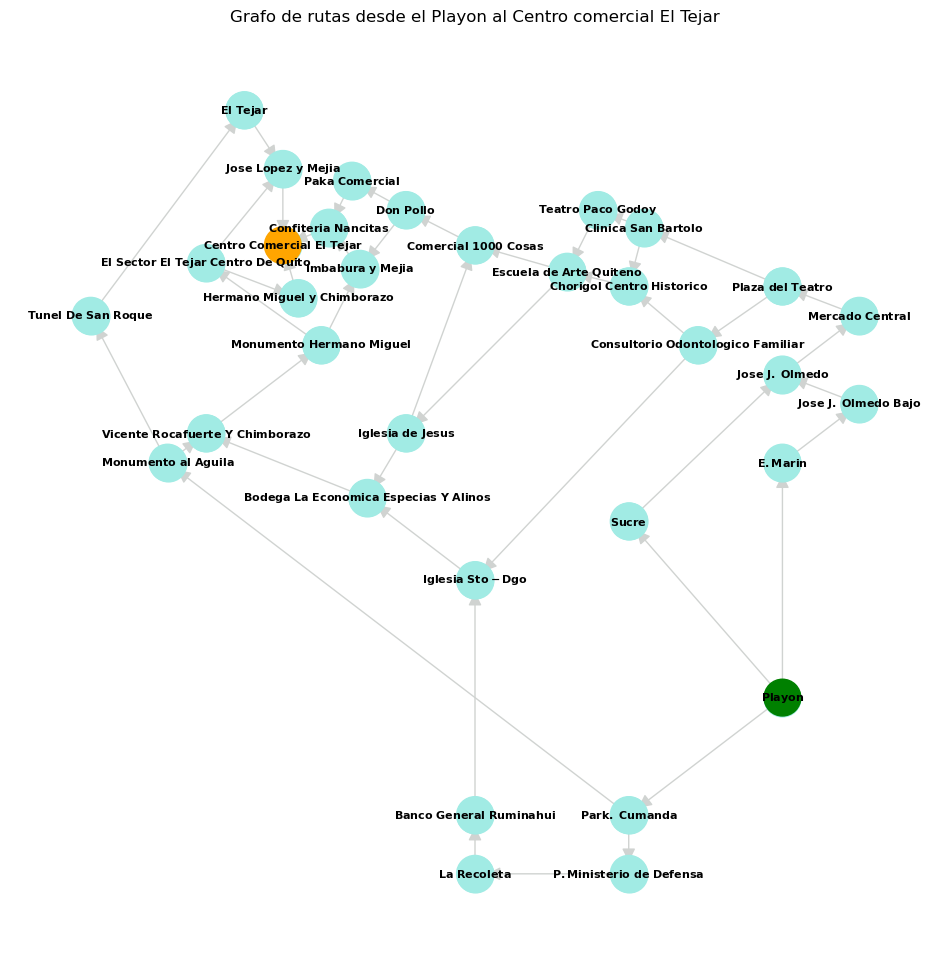

In [79]:
 # Leer el grafo desde el archivo 'grafo.txt'
estructura_grafo = leer_grafo_desde_archivo('grafo.txt')
grafo = Grafo(estructura_grafo)

# BFS y DFS para encontrar rutas en el campus
start, finish = 'Playon', 'Centro Comercial El Tejar'
ruta_dfs = grafo.dfs(start, finish)
graficar([],"Grafo de rutas desde el Playon al Centro comercial El Tejar")

La ruta más corta desde Playon a Centro Comercial El Tejar usando BFS es:



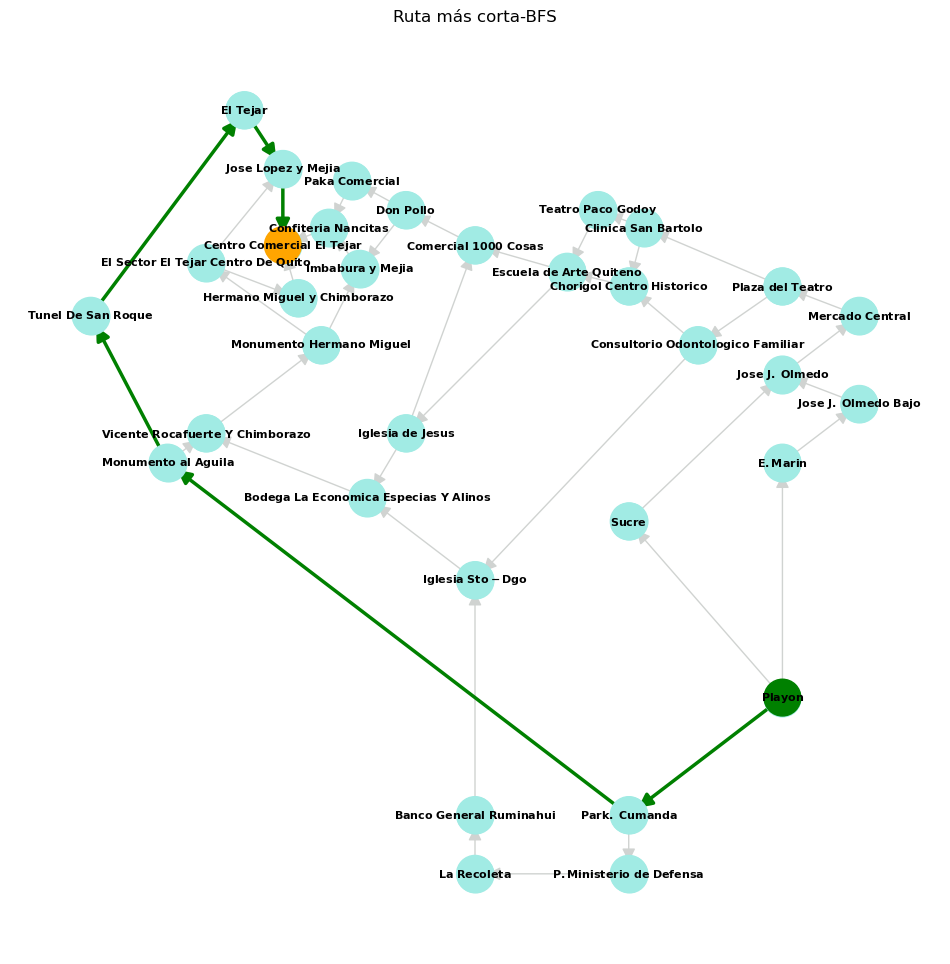

In [114]:
grafo = Grafo(estructura_grafo)

# BFS y DFS para encontrar rutas en el campus
start, finish = 'Playon', 'Centro Comercial El Tejar'
ruta_bfs = grafo.bfs(start, finish)
print(f"La ruta más corta desde {start} a {finish} usando BFS es:\n")
graficar(ruta_bfs,"Ruta más corta-BFS")

La ruta más profunda desde Playon a Centro Comercial El Tejar usando DFS es: 
 


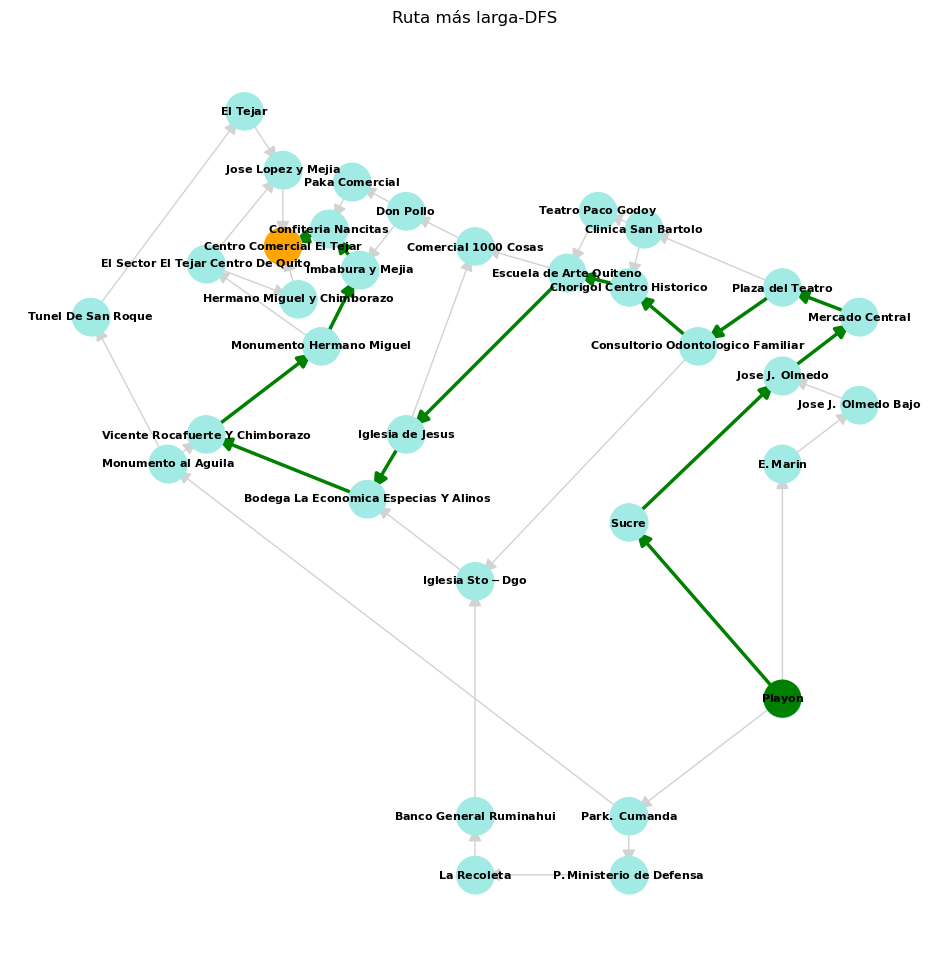

In [112]:
 # Leer el grafo desde el archivo 'grafo.txt'
estructura_grafo = leer_grafo_desde_archivo('grafo.txt')
grafo = Grafo(estructura_grafo)

# BFS y DFS para encontrar rutas en el campus
start, finish = 'Playon', 'Centro Comercial El Tejar'
ruta_dfs = grafo.dfs(start, finish)
print(f"La ruta más profunda desde {start} a {finish} usando DFS es: \n ")
graficar(ruta_dfs,"Ruta más larga-DFS")

\section{4. CONCLUSIONES}



- La implementación del algoritmo BFS ha confirmado su eficiencia en la optimización de rutas, alineándose con el objetivo de mejorar la planificación del tránsito y la movilidad en la ciudad, como se planteó en la introducción.
- El análisis realizado con el algoritmo DFS ha revelado patrones de conectividad complejos entre nodos urbanos, proporcionando una perspectiva más profunda que complementa los conceptos discutidos en la introducción y cumple con el objetivo de explorar rutas alternativas.
- La investigación ha demostrado que la combinación de BFS y DFS es esencial para una comprensión holística de las redes de transporte, reflejando los conceptos teóricos mencionados inicialmente y cumpliendo con el objetivo de diseñar sistemas inteligentes de navegación.
- Los resultados obtenidos subrayan la transición de los algoritmos de búsqueda en grafos de ser un problema puramente teórico a convertirse en una herramienta práctica y aplicable en ingeniería urbana, como se anticipó en la introducción del estudio.

\section{5. DECLARACIÓN DE USO DE IA}  



Se utilizó chatGPT y copilot para mejorar el código de impresión de los grafos y la redacción en la introducción y conclusiones.